函数：$$y = f(x) = kx + b$$

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [18]:
def generate_linear_data(k = 2.0, b = 1.0, num = 50, noise_std = 1.0, seed = 42):
    """Generate random linear data with noise."""
    np.random.seed(seed)
    x = np.linspace(0, 10, num)
    noise = np.random.normal(0, noise_std, size = num)
    y = k * x + b + noise
    return x, y

### 最小二乘法拟合直线



对于线性模型：$y=A\beta+\epsilon,$，其中：
- $y\in\R^n$：（实际）观测值向量
- $A\in\R^{n\times p}$：矩阵（含自变量和常数项）
- $\color{red}\beta\in\R^p$：待求参数向量（`k,b`）
- $\epsilon\in\R^n$：误差向量

本质：寻找一个**最优近似解**，使预测值和真实值的平方误差之和（距离平方和）最小
$$\min_{\beta}\sum_{i=1}^{n}\left(y_i - \hat{y}_i\right)^2 = \min_{\beta}\|y - A\beta\|^2$$

公式：$A^TA\beta = A^Ty$

> Note：若 $A^{T}A$ 可逆，则解析解为：$\hat{\beta}=\left(A^TA\right)^{-1}A^Ty$


In [19]:
def least_squares_fit(x, y):
    """Fit y = kx + b using least squares."""
    A = np.vstack([x, np.ones_like(x)]).T
    k, b = np.linalg.lstsq(A, y, rcond = None)[0]
    return k, b

`A = np.vstack([x, np.ones_like(x)]).T` 原理：

- 第一行放所有`x`值 → 对应斜率`k`
- 第二行全部是`1` → 对应截距`b`

> 对应 `kx + b`

比如`x=[1,2,3]`，得到：
```py
[[1, 2, 3], 
 [1, 1, 1]]
```

然后`.T`，得到`A`：

```py
[[1, 1],
 [2, 1],
 [3, 1]]
```

`k, b = np.linalg.lstsq(A, y, rcond = None)[0]` 原理：

求解线性方程组 $Ax = y$ 中 $x$ 的最佳近似解，本例为$A\begin{bmatrix}k \\ b\end{bmatrix} = y$

返回值元组：`(x, residuals, rank, s)`

In [20]:
def plot_data_and_fit(x, y, k, b):
    """Plot data points and fitted line."""
    plt.figure(figsize = (8, 5))
    plt.scatter(x, y, c = "blue", label = "Data")
    plt.plot(x, k * x + b, c = "red", label = f"Fitted line: y={k:.2f}x+{b:.2f}")
    print(f"The best estimated parameters are: \nk = {k:.2f}, b = {b:.2f}")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Linear Regression Fit")
    plt.legend()
    plt.tight_layout()
    plt.show()

In [21]:
def mse_loss(x, y, k, b):
    """Mean squared error loss."""
    return np.mean((y - (k * x + b)) ** 2) / 2


In [22]:
def plot_loss_contour(x, y, k_true, b_true, k_fit = None, b_fit = None):
    """Visualize the loss function (MSE) as a contour plot."""
    k_vals = np.linspace(k_true - 3, k_true + 3, 100)
    b_vals = np.linspace(b_true - 5, b_true + 5, 100)
    K, B = np.meshgrid(k_vals, b_vals)
    Z = np.array([[mse_loss(x, y, k, b) for k, b in zip(row_k, row_b)]
                for row_k, row_b in zip(K, B)])
    
    plt.figure(figsize=(10, 6))
    contour = plt.contour(K, B, Z, 40, cmap = 'viridis')
    
    plt.clabel(contour, inline = True, fontsize = 8, fmt = "%.1f")
    plt.xlabel('Slope (k)')
    plt.ylabel('Intercept (b)')
    plt.title('MSE Contour')

    cbar = plt.colorbar(contour)
    cbar.set_label("Mean Squared Error (MSE)")

    plt.scatter([k_fit], [b_fit], color = 'red', label = 'Best fitted value: (k, b)')
    plt.text(k_fit + 0.1, b_fit + 0.1, f'({k_fit:.2f}, {b_fit:.2f})', c = 'red', fontsize = 9, ha = 'left', va = 'bottom')
    
    plt.legend()
    plt.tight_layout()
    plt.show()

In [23]:
def plot_loss_contour_3d(x, y, k_true, b_true, k_fit = None, b_fit = None):
    """Visualize the loss function (MSE) as a 3D surface plot."""
    k_vals = np.linspace(k_true - 3, k_true + 3, 100)
    b_vals = np.linspace(b_true - 5, b_true + 5, 100)
    K, B = np.meshgrid(k_vals, b_vals)
    Z = np.array([[mse_loss(x, y, k, b) for k, b in zip(row_k, row_b)]
                for row_k, row_b in zip(K, B)])

    fig = plt.figure(figsize = (12, 8))
    ax = fig.add_subplot(111, projection = '3d')
    surface = ax.plot_surface(K, B, Z, cmap = 'viridis', alpha = 0.8)

    ax.contour(K, B, Z, 40, offset = np.min(Z) - 10, cmap = 'viridis', linestyles = 'solid')

    ax.set_xlabel('Slope (k)')
    ax.set_ylabel('Intercept (b)')
    ax.set_zlabel('Mean Squared Error (MSE)')
    ax.set_title('3D MSE Surface')

    fig.colorbar(surface, ax = ax, shrink = 0.5, aspect = 5, label = 'MSE')

    ax.scatter([k_fit], [b_fit], [mse_loss(x, y, k_fit, b_fit)], color = 'red', s = 100, label = f'Best fitted value: (k={k_fit:.2f}, b={b_fit:.2f})')
    
    plt.legend()
    plt.tight_layout()
    plt.show()

The best estimated parameters are: 
k = 1.94, b = 1.06


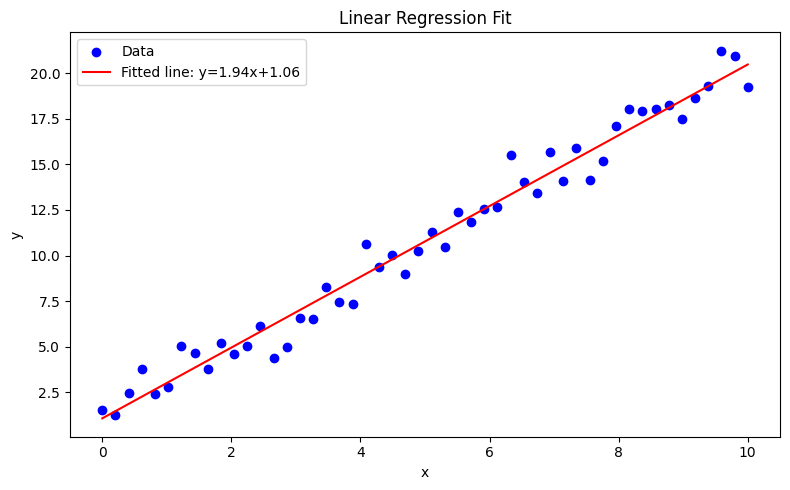

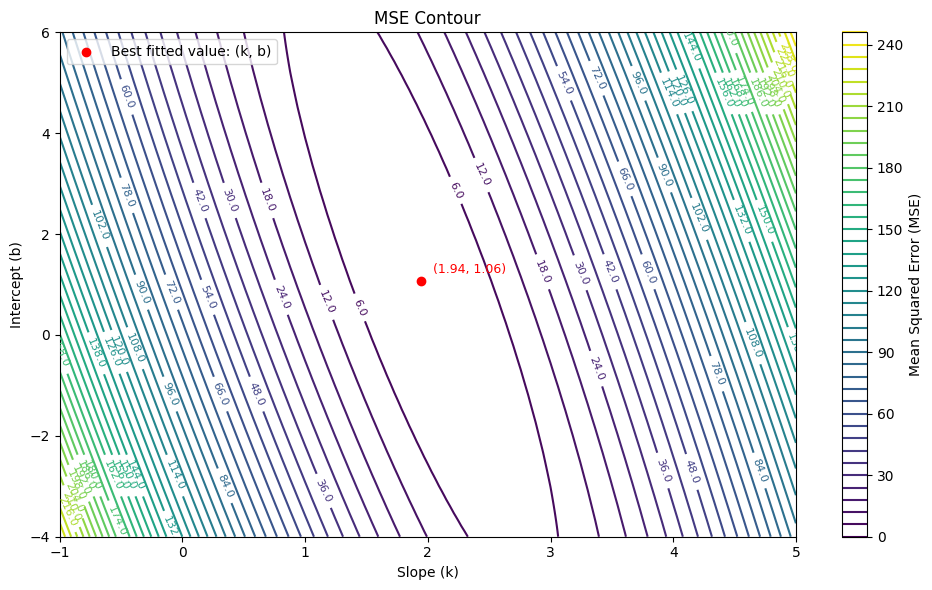

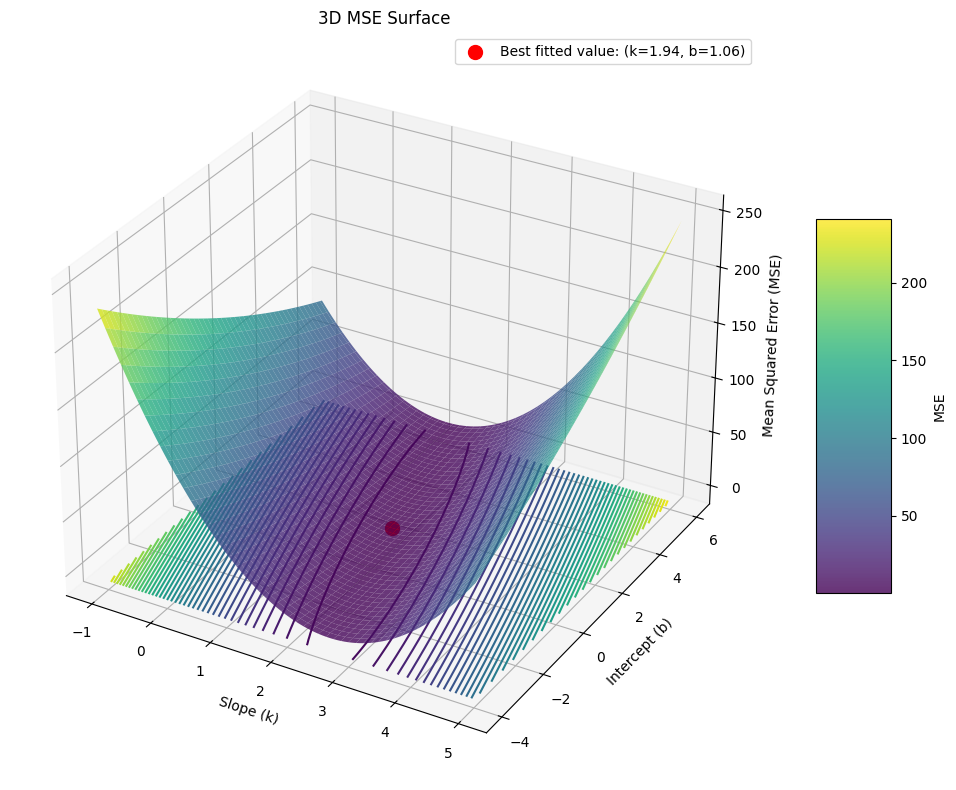

In [24]:
if __name__ == "__main__":
    # 1. Generate data
    k_true, b_true = 2.0, 1.0
    x, y = generate_linear_data(k = k_true, b = b_true, num = 50, noise_std = 1.0)

    # 2. Fit using least squares
    k_fit, b_fit = least_squares_fit(x, y)

    # 3. Plot data and fit
    plot_data_and_fit(x, y, k_fit, b_fit)

    # 4. Visualize loss function
    plot_loss_contour(x, y, k_true, b_true, k_fit, b_fit)

    # 5. Visualize loss function in 3D
    plot_loss_contour_3d(x, y, k_true, b_true, k_fit, b_fit)